### image clustering

use venv N2D

https://arxiv.org/pdf/1908.05968.pdf

https://n2d.readthedocs.io/en/latest/quickstart.html#building-the-model

see also:

https://github.com/sudiptodip15/ClusterGAN

https://github.com/zhampel/clusterGAN

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [2]:
import os
import urllib3

import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from pathlib import Path
from PIL import Image
from skimage import color
from skimage import io
import n2d
from n2d import datasets as data

Using TensorFlow backend.
/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x = np.concatenate((x_train, x_test))

In [5]:
x.shape

(70000, 28, 28)

In [6]:
y = np.concatenate((y_train, y_test))

In [7]:
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)

In [8]:
x.shape

(70000, 784)

### n2d

In [9]:
m_x, m_y = data.load_mnist()

In [10]:
n_cl_mnist = 10

In [11]:
path = Path('weights_n2d_example')

In [12]:
m_x.shape

(70000, 784)

In [13]:
type(m_x[0])

numpy.ndarray

In [14]:
mnistcl = n2d.n2d(m_x, nclust = n_cl_mnist)


n2d.__init__() shape: [784, 500, 500, 2000, 10], architecture: [500, 500, 2000]
AutoEncoder.__init__() dims: 5
AutoEncoder.__init__() x: (None, 784)
AutoEncoder.__init__() n_stacks: 4
AutoEncoder.__init__() i: 0
AutoEncoder.__init__() i: 1
AutoEncoder.__init__() i: 2
AutoEncoder.__init__() pre Dense h: (None, 2000)
AutoEncoder.__init__() post Dense h: (None, 784)
n2d.__init__() hidden: (None, 10)


In [15]:
mnistcl.preTrainEncoder(weights=path/"mnist-1000-ae_weights.h5")

In [16]:
mnistManifold = n2d.UmapGMM(n_cl_mnist)
mnistcl.predict(mnistManifold)

/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../..

saving figure to: viz/mnist-n2d.png


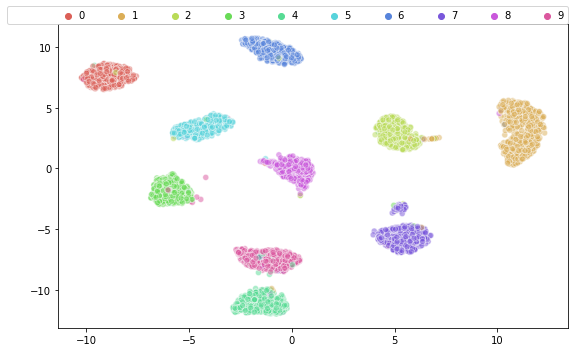

best_cluster_fit y_true: (70000,), y_pred: (70000,)


/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


saving figure to: viz/mnist-n2d-predicted.png


<Figure size 432x288 with 0 Axes>

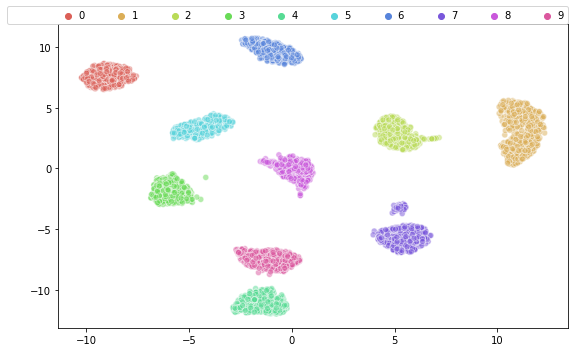

<Figure size 432x288 with 0 Axes>

In [17]:
mnistcl.visualize(m_y, names = None, dataset = "mnist", nclust = n_cl_mnist)


In [18]:
print(mnistcl.assess(m_y))

best_cluster_fit y_true: (70000,), y_pred: (70000,)


/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


(0.97566, 0.93533, 0.94695)


/home/walle/.virtualenvs/N2D/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### fashion

In [19]:
def load_fashion():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x = np.concatenate((x_train, x_test))
    print(x.shape)
    y = np.concatenate((y_train, y_test))
    print(y.shape)
    x = x.reshape((x.shape[0], -1))
    x = np.divide(x, 255.)
    y_names = {0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
               5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
    return x, y, y_names

In [20]:
x, y, y_names=load_fashion()

(70000, 28, 28)
(70000,)


In [21]:
y[0]

9

In [22]:
#m_x, m_y = data.load_mnist()
#
#n_cl_mnist = 10
#
#mnistcl = n2d.n2d(m_x, nclust = n_cl_mnist)
#mnistcl.preTrainEncoder(weights="mnist-1000-ae_weights.h5")
#
#mnistManifold = n2d.UmapGMM(n_cl_mnist)
#mnistcl.predict(mnistManifold)
#
#mnistcl.visualize(m_y, names = None, dataset = "mnist", nclust = n_cl_mnist)
#print(mnistcl.assess(m_y))
#
#from sklearn.cluster import SpectralClustering
#import umap
##class UmapSpectral:
#    def __init__(self, nclust,
#                 umapdim = 2,
#                 umapN = 10,
#                 umapMd = float(0),
#                 umapMetric = 'euclidean',
#                 random_state = 0):
#        self.nclust = nclust
#	# change this bit for changing the manifold learner
#        self.manifoldInEmbedding = umap.UMAP(
#            random_state = random_state,
#            metric = umapMetric,
#            n_components = umapdim,
#            n_neighbors = umapN,
#            min_dist = umapMd
#        )
#	# change this bit to change the clustering mechanism
#        self.clusterManifold = SpectralClustering(
#    		n_clusters = nclust,
#    		affinity = 'nearest_neighbors',
#    		random_state = random_state
#    	)
#
#        self.hle = None
#
#
#    def predict(self, hl):
#        # obviously if you change the clustering method or the manifold learner
#        # youll want to change the predict method too.
#        self.hle = self.manifoldInEmbedding.fit_transform(hl)
#        self.clusterManifold.fit(self.hle)
#        y_pred = self.clusterManifold.fit_predict(self.hle)
#        return(y_pred)
#
## manifoldSC = UmapSpectral(6)
## harcluster.predict(manifoldSC)
## print(harcluster.assess(y))